# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

1.1 Goal is to analyze the used car data, understand which features impacts price of car to what extent and draft recommendations for dealership.

In [9]:
import pandas as pd
import numpy as np

cars_df = pd.read_csv('data/vehicles.csv')
cars_df.head()
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

2.1 Understanding of data helps in identifying certains columns which may not have any significant impact on the car prices. We will remove id, region, cylinders, paint_color and VIN columns.

In [10]:
cars_df1 = cars_df.drop(columns=['id', 'region', 'cylinders', 'paint_color', 'VIN' ])

num_duplicate_rows = cars_df1.duplicated().sum()
print(f"Number of duplicate rows in cars_df1: {num_duplicate_rows}")
print(f"Total number of records in cars_df1: {len(cars_df1)}")

Number of duplicate rows in cars_df1: 128173
Total number of records in cars_df1: 426880


2.2 check for duplicate rows again after removing select columns and delete duplicate records.

In [11]:
num_duplicate_rows = cars_df1.duplicated().sum()
print(f"Number of duplicate rows in cars_df1: {num_duplicate_rows}")
cars_df1.drop_duplicates(inplace=True)
print(f"Number of rows in cars_df1 after removing duplicates: {len(cars_df1)}")

Number of duplicate rows in cars_df1: 128173
Number of rows in cars_df1 after removing duplicates: 298707


2.3 Analyze the data for each feature including price.

In [12]:
columns_to_check = [
    'year', 'manufacturer', 'model', 'condition', 'fuel',
    'odometer', 'title_status', 'transmission', 'drive', 'type', 'state'
]

for col in columns_to_check:
    print(f"Unique values for '{col}':")
    print(cars_df1[col].unique())
    print(f"Unique values count '{cars_df1[col].nunique()}':")
    print(f"Missing values for '{col}': {cars_df1[col].isnull().sum()}\n")

Unique values for 'year':
[  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.]
Unique values count '114':
Missing values for 'year': 869

Unique values for 'manufacturer':
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-rome

2.4 Analyze Unique Models per Manufacturer

Unique models per manufacturer (first 10 entries):

manufacturer
acura            315
alfa-romeo        38
aston-martin      12
audi             646
bmw             1129
buick            337
cadillac         432
chevrolet       2611
chrysler         351
datsun            20
Name: model, dtype: int64


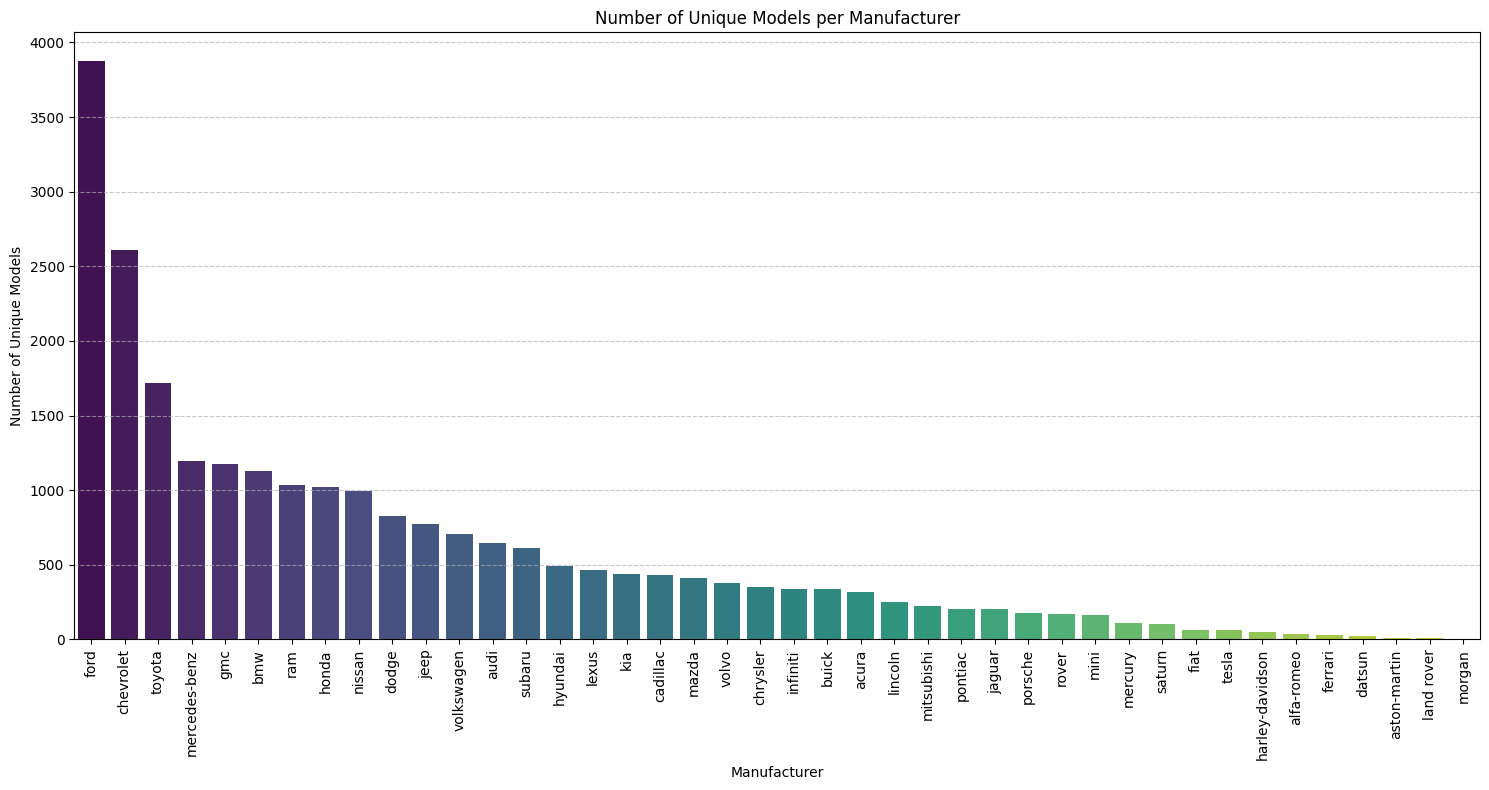

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_models_per_manufacturer = cars_df1.groupby('manufacturer')['model'].nunique()

print("Unique models per manufacturer (first 10 entries):\n")
print(unique_models_per_manufacturer.head(10))
# Sort the manufacturers by the number of unique models for better visualization
unique_models_per_manufacturer_sorted = unique_models_per_manufacturer.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=unique_models_per_manufacturer_sorted.index, y=unique_models_per_manufacturer_sorted.values, palette='viridis', hue=unique_models_per_manufacturer_sorted.index, legend=False)
plt.title('Number of Unique Models per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Unique Models')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2.5 Plot the number of records year wise.

Total number of records : 298707


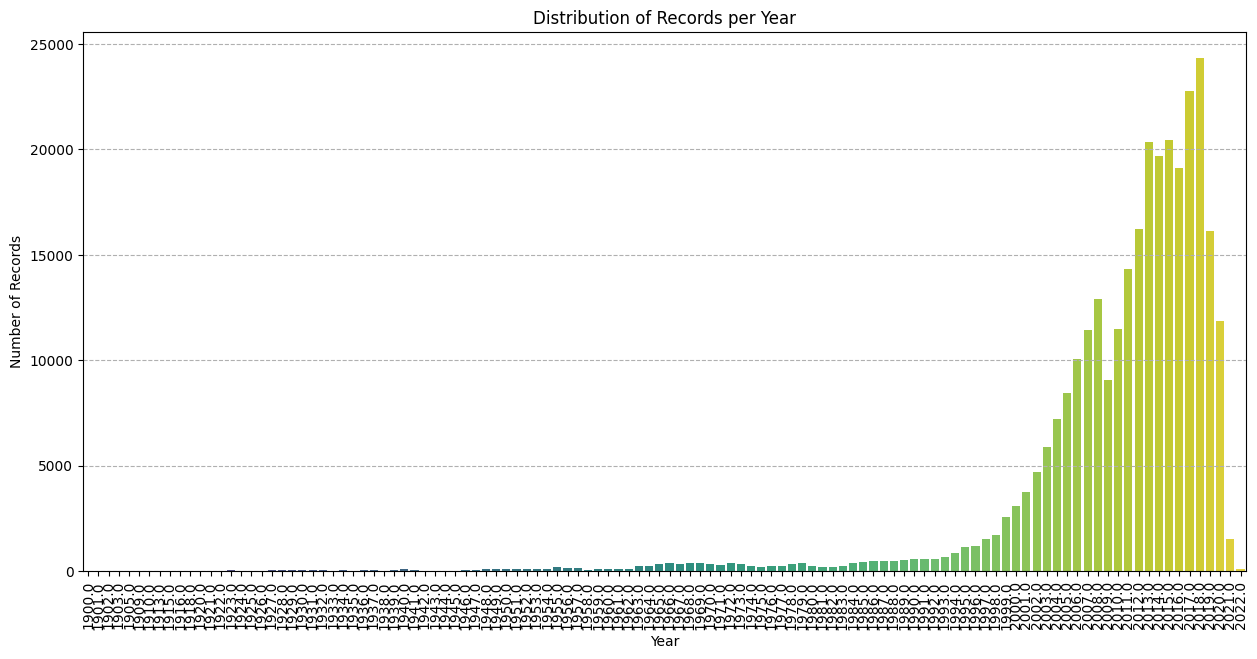

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
print(f"Total number of records : {len(cars_df1)}")

plt.figure(figsize=(15, 7))
sns.countplot(x='year', data=cars_df1, palette='viridis', hue='year', legend=False)
plt.title('Distribution of Records per Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()

2.6 Analyze records with outliers for car prices

In [15]:
num_cars_low_price = cars_df1[(cars_df1['price'] < 100)].shape[0]
print(f"Number of cars with price < 100 in cars_df1: {num_cars_low_price}")
cars_df2 = cars_df1.copy()
print(f"cars_df2 shape: {cars_df2.shape}")
print(f"cars_df2 shape: {cars_df2.shape}")
print(f"Total number of records in cars_df2: {len(cars_df2)}")

Number of cars with price < 100 in cars_df1: 21589
cars_df2 shape: (298707, 13)
cars_df2 shape: (298707, 13)
Total number of records in cars_df2: 298707


We can delete rows with missing value for manufacturer, model and year (it is not easy to handle these missing value without impacting the outcome) as numbers of records are not big. We have also identified identified outliers in terms of proce and in terms of records prior to 1990. In next section, we will delete the outliers and prepare the data for modelling.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

3.1 remove the records which are outliers in terms of year wise distrution.

Number of records before dropping NaNs: 298707
Number of records after dropping NaNs in manufacturer, model or year: 281473
Number of records after removing cars from 1990 or earlier: 272510


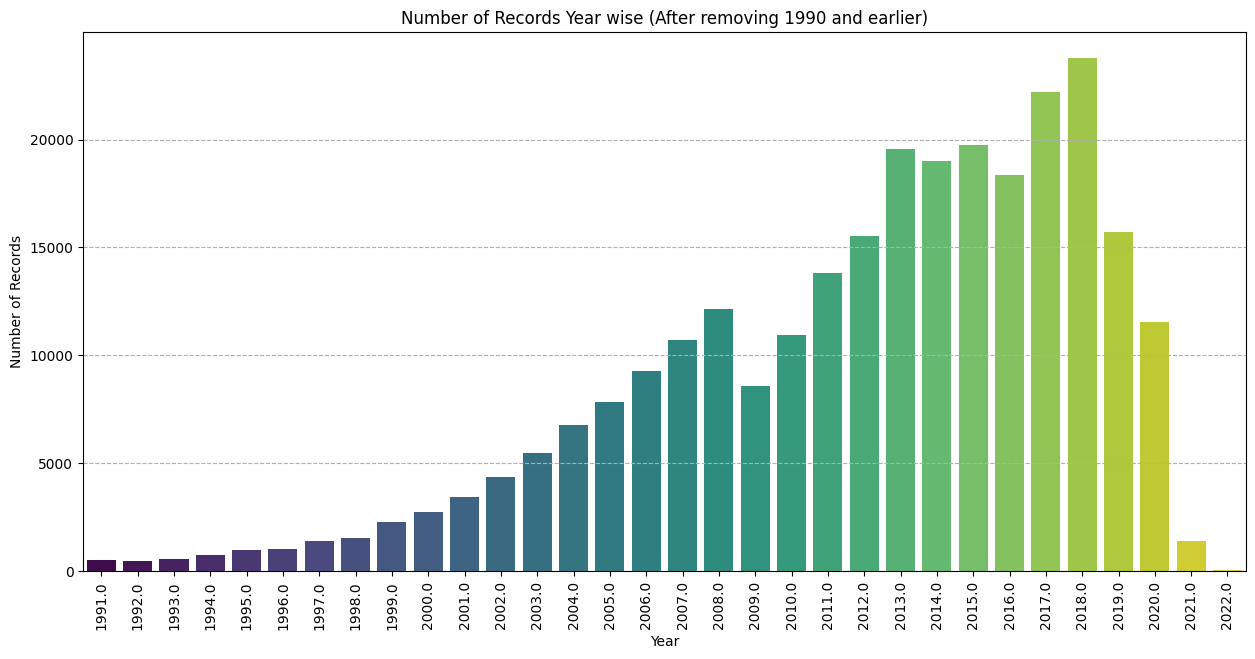

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Delete records with NaN values for columns with relatively less number of records
print(f"Number of records before dropping NaNs: {len(cars_df2)}")
cars_df2.dropna(subset=['manufacturer', 'model', 'year'], inplace=True)
print(f"Number of records after dropping NaNs in manufacturer, model or year: {len(cars_df2)}")

# Delete records with year value 1990 or below
cars_df2 = cars_df2[cars_df2['year'] > 1990]
print(f"Number of records after removing cars from 1990 or earlier: {len(cars_df2)}")

# Plot the number of records by year for the updated DataFrame
plt.figure(figsize=(15, 7))
sns.countplot(x='year', data=cars_df2, palette='viridis', hue='year', legend=False)
plt.title('Number of Records Year wise (After removing 1990 and earlier)')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()

3.2 remove the records which are outliers in terms of car prices

Number of records after removing cars of price below $100 entries: 252554
Number of records after removing extreme upper price outliers: 250028

Descriptive statistics for 'price' column after cleaning:


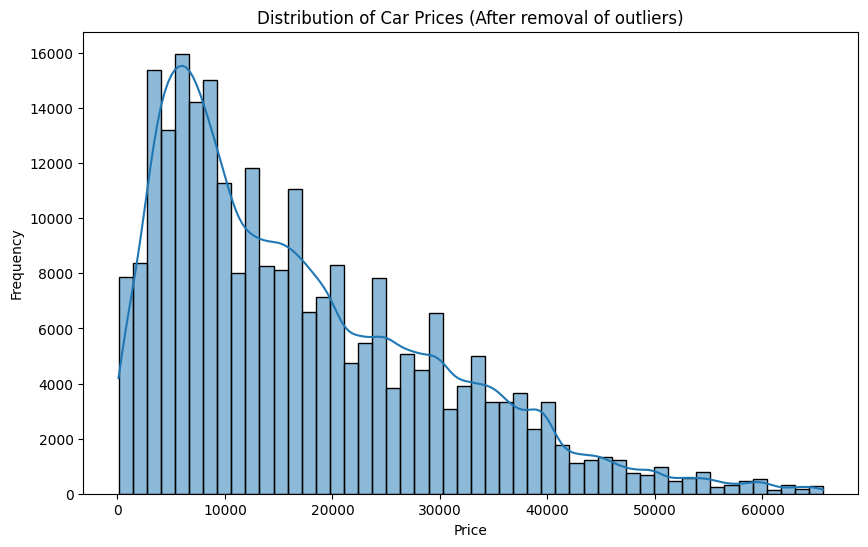

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove cars with price less than $100
cars_df2 = cars_df2[cars_df2['price'] > 100]
print(f"Number of records after removing cars of price below $100 entries: {len(cars_df2)}")

# Remove extreme upper outliers for price (top 1%)
upper_bound_price = cars_df2['price'].quantile(0.99)
cars_df2 = cars_df2[cars_df2['price'] < upper_bound_price]
print(f"Number of records after removing extreme upper price outliers: {len(cars_df2)}")

print("\nDescriptive statistics for 'price' column after cleaning:")

plt.figure(figsize=(10, 6))
sns.histplot(cars_df2['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices (After removal of outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

3.3 Analyze the records with missing values.

In [18]:
#analyze features which need handling for missing values
columns_to_check = [
    'condition', 'fuel', 'odometer', 'title_status',
    'transmission', 'size' , 'drive', 'type'
]

for col in columns_to_check:
    print(f"Unique values for '{col}':")
    print(cars_df2[col].unique())
    print(f"Missing values for '{col}': {cars_df2[col].isnull().sum()}\n")

Unique values for 'condition':
['good' 'excellent' 'fair' 'like new' 'new' nan 'salvage']
Missing values for 'condition': 89854

Unique values for 'fuel':
['gas' 'other' 'diesel' 'hybrid' nan 'electric']
Missing values for 'fuel': 1310

Unique values for 'odometer':
[57923. 71229. 19160. ... 94964. 26892. 69550.]
Missing values for 'odometer': 1217

Unique values for 'title_status':
['clean' 'rebuilt' 'lien' nan 'salvage' 'missing' 'parts only']
Missing values for 'title_status': 3976

Unique values for 'transmission':
['other' 'automatic' 'manual' nan]
Missing values for 'transmission': 1091

Unique values for 'size':
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
Missing values for 'size': 171202

Unique values for 'drive':
[nan 'rwd' '4wd' 'fwd']
Missing values for 'drive': 71126

Unique values for 'type':
['pickup' 'truck' 'other' nan 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'convertible' 'wagon' 'van' 'bus']
Missing values for 'type': 53609



3.4 Replace the missing values in the 'condition', 'drive', and 'type' columns with the new category 'Unknown' as there are significant number of records (>10,000) for these missing values.
Missing 'odometer' value will be replaced with median values.

In [19]:
# Replace missing values in 'condition' with 'Unknown'
cars_df2['condition'] = cars_df2['condition'].fillna('Unknown')
print(f"Missing values in 'condition' after imputation: {cars_df2['condition'].isnull().sum()}")

# Replace missing values in 'drive' with 'Unknown'
cars_df2['drive'] = cars_df2['drive'].fillna('Unknown')
print(f"Missing values in 'drive' after imputation: {cars_df2['drive'].isnull().sum()}")

# Replace missing values in 'type' with 'Unknown'
cars_df2['type'] = cars_df2['type'].fillna('Unknown')
print(f"Missing values in 'type' after imputation: {cars_df2['type'].isnull().sum()}")

# Replace missing values in 'size' with 'Unknown'
cars_df2['size'] = cars_df2['size'].fillna('Unknown')
print(f"Missing values in 'size' after imputation: {cars_df2['size'].isnull().sum()}")

# Impute missing values in 'odometer' with its median
median_odometer = cars_df2['odometer'].median()
#cars_df2['odometer'].fillna(median_odometer, inplace=True)
cars_df2['odometer'] = cars_df2['odometer'].fillna(median_odometer)
print(f"Missing values in 'odometer' after imputation: {cars_df2['odometer'].isnull().sum()}")
print(f"Number of records before dropping NaNs in 'fuel', 'title_status', 'transmission': {len(cars_df2)}")
cars_df2.dropna(subset=['fuel', 'title_status', 'transmission'], inplace=True)
print(f"Number of records after dropping NaNs in 'fuel', 'title_status', 'transmission': {len(cars_df2)}")
non_numeric_cols = cars_df2.select_dtypes(include=['object']).columns

print("Analysis of Non-Numeric Columns:")
print("---------------------------------")

for col in non_numeric_cols:
    print(f"Column: '{col}'")
    print(f"Unique values: {cars_df2[col].unique()}")
    print(f"Number of missing values: {cars_df2[col].isnull().sum()}\n")


Missing values in 'condition' after imputation: 0
Missing values in 'drive' after imputation: 0
Missing values in 'type' after imputation: 0
Missing values in 'size' after imputation: 0
Missing values in 'odometer' after imputation: 0
Number of records before dropping NaNs in 'fuel', 'title_status', 'transmission': 250028
Number of records after dropping NaNs in 'fuel', 'title_status', 'transmission': 244097
Analysis of Non-Numeric Columns:
---------------------------------
Column: 'manufacturer'
Unique values: ['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'mini'
 'pontiac' 'fiat' 'rover' 'tesla' 'saturn' 'mercury' 'harley-davidson'
 'aston-martin' 'land rover' 'ferrari']
Number of missing values: 0

Column: 'model'
Unique values: ['sierra 1500 crew cab slt' 'silve

3.5 To represent the manufacturer and model information numerically while maintaining model's relationship with the manufacturer, two new column are  created. This transformation involves two steps:

1) assign numeric values to manufacturer in order of 5000's

2) assign numeric values to model keeping manufacturer relationship intact for example model value of 5002 would mean it belongs to manufacturer 5000.



In [20]:
unique_manufacturers = cars_df2['manufacturer'].unique()
manufacturer_mapping = {name: 5000 * (i + 1) for i, name in enumerate(unique_manufacturers)}

cars_df2['manufacturer_numeric'] = cars_df2['manufacturer'].map(manufacturer_mapping)

print("Original 'manufacturer' column head:")
print(cars_df2['manufacturer'].head())
print("\nNew 'manufacturer_numeric' column head:")
print(cars_df2['manufacturer_numeric'].head())
print("\nUnique numeric values for 'manufacturer_numeric':")
print(cars_df2['manufacturer_numeric'].unique())

Original 'manufacturer' column head:
27          gmc
28    chevrolet
29    chevrolet
30       toyota
31         ford
Name: manufacturer, dtype: object

New 'manufacturer_numeric' column head:
27     5000
28    10000
29    10000
30    15000
31    20000
Name: manufacturer_numeric, dtype: int64

Unique numeric values for 'manufacturer_numeric':
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000]


3.6 update the model column with numeric values in a manner which maintains the relationship with respective manufacturer values.

In [21]:
cars_df2['model_numeric'] = cars_df2.groupby('manufacturer_numeric')['model'].transform(lambda x: pd.factorize(x)[0] + 1 + x.name)

print("Original 'model' column head for a manufacturer (e.g., gmc):")
print(cars_df2[cars_df2['manufacturer'] == 'gmc'][['manufacturer', 'model', 'manufacturer_numeric', 'model_numeric']].head(10))
print("\nUnique numeric values for 'model_numeric':")
print(cars_df2['model_numeric'].unique())

Original 'model' column head for a manufacturer (e.g., gmc):
    manufacturer                         model  manufacturer_numeric  \
27           gmc      sierra 1500 crew cab slt                  5000   
32           gmc   sierra 2500 hd extended cab                  5000   
58           gmc       sierra 1500 regular cab                  5000   
61           gmc  sierra 1500 extended cab slt                  5000   
103          gmc    sierra 1500 limited double                  5000   
104          gmc  sierra 1500 extended cab slt                  5000   
111          gmc    acadia sle-2 sport utility                  5000   
113          gmc    acadia slt-1 sport utility                  5000   
151          gmc    acadia sle-2 sport utility                  5000   
152          gmc   acadia denali sport utility                  5000   

     model_numeric  
27            5001  
32            5002  
58            5003  
61            5004  
103           5005  
104           5004  

In [22]:
cars_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244097 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 244097 non-null  int64  
 1   year                  244097 non-null  float64
 2   manufacturer          244097 non-null  object 
 3   model                 244097 non-null  object 
 4   condition             244097 non-null  object 
 5   fuel                  244097 non-null  object 
 6   odometer              244097 non-null  float64
 7   title_status          244097 non-null  object 
 8   transmission          244097 non-null  object 
 9   drive                 244097 non-null  object 
 10  size                  244097 non-null  object 
 11  type                  244097 non-null  object 
 12  state                 244097 non-null  object 
 13  manufacturer_numeric  244097 non-null  int64  
 14  model_numeric         244097 non-null  int64  
dtypes: f

3.7 update state column values to numeric values

In [26]:
# Convert 'state' column to numeric values using factorization (label encoding)
cars_df2['state_numeric'] = pd.factorize(cars_df2['state'])[0] + 1

# Identify remaining categorical columns for one-hot encoding (excluding those already processed)
remaining_categorical_cols = [
    'condition','fuel', 'title_status',
    'transmission', 'drive', 'size', 'type'
]

# Apply one-hot encoding to the remaining categorical features
cars_df_encoded = pd.get_dummies(cars_df2, columns=remaining_categorical_cols, drop_first=True)

print("Columns in cars_df_encoded:")
print(cars_df_encoded.columns.tolist())
cars_df_encoded.head()

Columns in cars_df_encoded:
['price', 'year', 'manufacturer', 'model', 'odometer', 'state', 'manufacturer_numeric', 'model_numeric', 'state_numeric', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'title_status_lien', 'title_status_missing', 'title_status_parts only', 'title_status_rebuilt', 'title_status_salvage', 'transmission_manual', 'transmission_other', 'drive_Unknown', 'drive_fwd', 'drive_rwd', 'size_compact', 'size_full-size', 'size_mid-size', 'size_sub-compact', 'type_Unknown', 'type_bus', 'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van', 'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon']


,price,year,manufacturer,model,odometer,state,manufacturer_numeric,model_numeric,state_numeric,condition_excellent,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
27,33590,2014.0,gmc,sierra 1500 crew cab slt,57923.0,al,5000,5001,1,False,...,False,False,False,False,False,True,False,False,False,False
28,22590,2010.0,chevrolet,silverado 1500,71229.0,al,10000,10001,1,False,...,False,False,False,False,False,True,False,False,False,False
29,39590,2020.0,chevrolet,silverado 1500 crew,19160.0,al,10000,10002,1,False,...,False,False,False,False,False,True,False,False,False,False
30,30990,2017.0,toyota,tundra double cab sr,41124.0,al,15000,15001,1,False,...,False,False,False,False,False,True,False,False,False,False
31,15000,2013.0,ford,f-150 xlt,128000.0,al,20000,20001,1,True,...,False,False,False,False,False,False,False,True,False,False


3.8 drop non numeric columns as we have transfromed these columns to numeric alternatives in earlier steps.

In [28]:
# Identify and drop non-numeric columns remaining in cars_df_encoded
non_numeric_cols_to_drop = cars_df_encoded.select_dtypes(include=['object']).columns

if len(non_numeric_cols_to_drop) > 0:
    print(f"Dropping the following non-numeric columns from cars_df2: {non_numeric_cols_to_drop.tolist()}")
    cars_df_encoded.drop(columns=non_numeric_cols_to_drop, inplace=True)
    print("Non-numeric columns dropped successfully.")
else:
    print("No non-numeric columns found to drop in cars_df2.")

# Display info to confirm remaining columns
cars_df_encoded.info()

No non-numeric columns found to drop in cars_df2.
<class 'pandas.core.frame.DataFrame'>
Index: 244097 entries, 27 to 426879
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    244097 non-null  int64  
 1   year                     244097 non-null  float64
 2   odometer                 244097 non-null  float64
 3   manufacturer_numeric     244097 non-null  int64  
 4   model_numeric            244097 non-null  int64  
 5   state_numeric            244097 non-null  int64  
 6   condition_excellent      244097 non-null  bool   
 7   condition_fair           244097 non-null  bool   
 8   condition_good           244097 non-null  bool   
 9   condition_like new       244097 non-null  bool   
 10  condition_new            244097 non-null  bool   
 11  condition_salvage        244097 non-null  bool   
 12  fuel_electric            244097 non-null  bool   
 13  fuel_gas     

In [29]:
print(f"Shape of cars_df_encoded: {cars_df_encoded.shape}")
print(f"Total number of records: {len(cars_df_encoded)}")

Shape of cars_df_encoded: (244097, 43)
Total number of records: 244097


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

4.1 Create test and train data set



In [30]:
from sklearn.model_selection import train_test_split

X = cars_df_encoded.drop('price', axis=1)
y = cars_df_encoded['price']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X (features): (244097, 42)
Shape of y (target): (244097,)
Shape of X_train: (195277, 42)
Shape of X_test: (48820, 42)
Shape of y_train: (195277,)
Shape of y_test: (48820,)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

We are building 3 regressions models (with polynomial degree of 2):
*   linear regression model
*   ridge regression model
*   lasso regression model








5.1 Linear Regression model (with Polynomial Feature of degree 2 and Scaling)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Create a pipeline for Linear Regression with Polynomial Features and Scaling
poly_linear_model_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

# Train the Polynomial Linear Regression model
poly_linear_model_pipeline.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_poly_linear = poly_linear_model_pipeline.predict(X_train)
mae_train_poly_linear = mean_absolute_error(y_train, y_pred_train_poly_linear)
mse_train_poly_linear = mean_squared_error(y_train, y_pred_train_poly_linear)

print("--- Polynomial Linear Regression Performance on Training Data ---")
print(f"Mean Absolute Error (MAE) on training set: {mae_train_poly_linear:.2f}")
print(f"Mean Squared Error (MSE) on training set: {mse_train_poly_linear:.2f}")

# Make predictions on the test data
y_pred_test_poly_linear = poly_linear_model_pipeline.predict(X_test)
mae_test_poly_linear = mean_absolute_error(y_test, y_pred_test_poly_linear)
mse_test_poly_linear = mean_squared_error(y_test, y_pred_test_poly_linear)

print("\n--- Polynomial Linear Regression Performance on Test Data ---")
print(f"Mean Absolute Error (MAE) on test set: {mae_test_poly_linear:.2f}")
print(f"Mean Squared Error (MSE) on test set: {mse_test_poly_linear:.2f}")

--- Polynomial Linear Regression Performance on Training Data ---
Mean Absolute Error (MAE) on training set: 4747.50
Mean Squared Error (MSE) on training set: 49744474.89

--- Polynomial Linear Regression Performance on Test Data ---
Mean Absolute Error (MAE) on test set: 4801.22
Mean Squared Error (MSE) on test set: 51524831.26


5.2 Analyze Coefficients of Polynomial Linear Regression Model

In [32]:
linear_poly_coefficients = poly_linear_model_pipeline.named_steps['linear'].coef_
poly_feature_names_linear = poly_linear_model_pipeline.named_steps['poly'].get_feature_names_out(X.columns)

# Create a DataFrame for better readability, combining feature names and coefficients
coefficients_linear_poly_df = pd.DataFrame({
    'Feature': poly_feature_names_linear,
    'Coefficient': linear_poly_coefficients
})

coefficients_linear_poly_df['Absolute_Coefficient'] = coefficients_linear_poly_df['Coefficient'].abs()

coefficients_linear_poly_sorted = coefficients_linear_poly_df.sort_values(by='Absolute_Coefficient', ascending=False).head(20)

print("Top 20 features by absolute coefficient value for Polynomial Linear Regression:")
display(coefficients_linear_poly_sorted)

print("\n---")

Top 20 features by absolute coefficient value for Polynomial Linear Regression:


,Feature,Coefficient,Absolute_Coefficient
126,manufacturer_numeric model_numeric,6.112568e+06,6.112568e+06
2,manufacturer_numeric,3.786611e+06,3.786611e+06
3,model_numeric,-3.769197e+06,3.769197e+06
44,year manufacturer_numeric,-3.748428e+06,3.748428e+06
45,year model_numeric,3.728488e+06,3.728488e+06
125,manufacturer_numeric^2,-3.150093e+06,3.150093e+06
165,model_numeric^2,-2.962446e+06,2.962446e+06
42,year^2,1.452157e+06,1.452157e+06
0,year,-1.442639e+06,1.442639e+06
65,year drive_fwd,-4.166848e+05,4.166848e+05



---


5.3 Ridge Regression with GridSearchCV (includes Polynomial Feature of degree 2 and Scaling)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

scaled_ridge_model_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

#Alpha input parameters have been tuned based on best alpha results. Initial list is not present as it took long to complete the processing.
param_grid_ridge = {
    'ridge__alpha': [0.00001, 0.0001, 0.001]
}

start_rcv = time.time()
grid_search_ridge = GridSearchCV(scaled_ridge_model_pipeline, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
end_rcv = time.time()

print(f"Ridge Time: {(end_rcv - start_rcv)/60:.2f} minutes")
print("GridSearchCV completed with refined alpha values. Best parameters found:")
print(grid_search_ridge.best_params_)

Ridge Time: 4.67 minutes
GridSearchCV completed with refined alpha values. Best parameters found:
{'ridge__alpha': 1e-05}


5.4 Analyze performance and coefficients of Ridge Regression Model

In [36]:
best_model_ridge = grid_search_ridge.best_estimator_

# Make predictions on the training data
y_pred_train_ridge = best_model_ridge.predict(X_train)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)

print("--- Ridge Regression Performance on Training Data ---")
print(f"Mean Absolute Error (MAE) on training set: {mae_train_ridge:.2f}")
print(f"Mean Squared Error (MSE) on training set: {mse_train_ridge:.2f}")

# Make predictions on the test data
y_pred_tuned = best_model_ridge.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print("\n--- Ridge Regression Performance on Test Data ---")
print(f"Mean Absolute Error (MAE) on test set: {mae_tuned:.2f}")
print(f"Mean Squared Error (MSE) on test set: {mse_tuned:.2f}")

ridge_coefficients = best_model_ridge.named_steps['ridge'].coef_
poly_feature_names_ridge = best_model_ridge.named_steps['poly'].get_feature_names_out(X.columns)

# Create a DataFrame for better readability, combining feature names and coefficients
coefficients_ridge_df = pd.DataFrame({
    'Feature': poly_feature_names_ridge,
    'Coefficient': ridge_coefficients
})

coefficients_ridge_df['Absolute_Coefficient'] = coefficients_ridge_df['Coefficient'].abs()

coefficients_ridge_sorted = coefficients_ridge_df.sort_values(by='Absolute_Coefficient', ascending=False).head(20)

print("\nTop 20 features by absolute coefficient value for Ridge Regression:")
display(coefficients_ridge_sorted)

print("\n---")

--- Ridge Regression Performance on Training Data ---
Mean Absolute Error (MAE) on training set: 4747.47
Mean Squared Error (MSE) on training set: 49745764.37

--- Ridge Regression Performance on Test Data ---
Mean Absolute Error (MAE) on test set: 4801.37
Mean Squared Error (MSE) on test set: 51525372.39

Top 20 features by absolute coefficient value for Ridge Regression:


,Feature,Coefficient,Absolute_Coefficient
126,manufacturer_numeric model_numeric,4.350591e+06,4.350591e+06
125,manufacturer_numeric^2,-2.273425e+06,2.273425e+06
2,manufacturer_numeric,2.242058e+06,2.242058e+06
3,model_numeric,-2.224680e+06,2.224680e+06
44,year manufacturer_numeric,-2.199466e+06,2.199466e+06
45,year model_numeric,2.179554e+06,2.179554e+06
165,model_numeric^2,-2.077131e+06,2.077131e+06
42,year^2,1.451298e+06,1.451298e+06
0,year,-1.441759e+06,1.441759e+06
65,year drive_fwd,-4.174381e+05,4.174381e+05



---


5.5 Lasso Regression Model

We have used LassoCV method instead of GridSearchCV method to optimize the efficieny (execution time).
Running Lasso regression with GridSearcCV and explict alpha values approximately took up to an hour (with Google Colab free version). Switch to LassoCV method and allowing it to tune alpha values takes less than 10 mins. Ridge Regression took less than 5 mins in same environment.

In [37]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

#param_grid_lasso =  [0.1, 0.5, 0.75]

#Instead of gridsearch function, we have used LassoCV method which implements similar function without need for seperate GridSearchCV method.
scaled_lasso_cv_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(cv=5))
])

start_lcv = time.time()
#grid_search_lasso = GridSearchCV(scaled_lasso_model_pipeline, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
scaled_lasso_cv_pipeline.fit(X_train, y_train)
end_lcv = time.time()

best_alpha = scaled_lasso_cv_pipeline.named_steps['lasso'].alpha_
print(f"The best alpha value is: {best_alpha}")
print(f"LassoCV Time: {(end_lcv - start_lcv)/60:.2f} minutes")

print(scaled_lasso_cv_pipeline.named_steps['lasso'].alpha_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2639528004.6289062, tolerance: 2600606066.8071094
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2663277769.158203, tolerance: 2599113198.4799776
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2891693654.4003906, tolerance: 2599113198.4799776
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergen

The best alpha value is: 15.57023429068784
LassoCV Time: 9.48 minutes
15.57023429068784


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.503e+10, tolerance: 3.249e+09
  model = cd_fast.enet_coordinate_descent(


5.6 Analyze performance and coefficients of Lasso Regression Model

In [39]:
best_lasso_model = scaled_lasso_cv_pipeline
y_pred_lasso = best_lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Best Lasso alpha: {best_lasso_model.named_steps['lasso'].alpha_}")
print(f"Mean Absolute Error (MAE) on test set (Lasso): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE) on test set (Lasso): {mse_lasso:.2f}")
lasso_coefficients = scaled_lasso_cv_pipeline.named_steps['lasso'].coef_
poly_feature_names_lasso = scaled_lasso_cv_pipeline.named_steps['poly'].get_feature_names_out(X.columns)

# Create a DataFrame for better readability, combining feature names and coefficients
coefficients_lasso_df = pd.DataFrame({
    'Feature': poly_feature_names_lasso,
    'Coefficient': lasso_coefficients
})

coefficients_lasso_df['Absolute_Coefficient'] = coefficients_lasso_df['Coefficient'].abs()

coefficients_lasso_sorted = coefficients_lasso_df.sort_values(by='Absolute_Coefficient', ascending=False).head(20)

print("Top 20 features by absolute coefficient value for Lasso Regression:")
display(coefficients_lasso_sorted)

print("\n---")

Best Lasso alpha: 15.57023429068784
Mean Absolute Error (MAE) on test set (Lasso): 5351.03
Mean Squared Error (MSE) on test set (Lasso): 58894317.56
Top 20 features by absolute coefficient value for Lasso Regression:


,Feature,Coefficient,Absolute_Coefficient
1,odometer,-4897.644397,4897.644397
84,odometer^2,3579.082995,3579.082995
42,year^2,3428.565030,3428.565030
854,type_Unknown^2,2970.497685,2970.497685
12,fuel_gas,-2632.194299,2632.194299
0,year,2298.867044,2298.867044
37,type_pickup,1840.483447,1840.483447
23,drive_fwd,-1793.628286,1793.628286
65,year drive_fwd,-1639.304242,1639.304242
497,fuel_gas type_Unknown,-1478.046740,1478.046740



---


5.7 Comparison of Lasso vs. Ridge Coefficients:

**Performance Metrics:**

*   **Ridge Regression (Test Set):**
    *   Mean Absolute Error (MAE): 4801.37
    *   Mean Squared Error (MSE): 51525372.39

*   **Lasso Regression (Test Set):**
    *   Mean Absolute Error (MAE): 5351.03
    *   Mean Squared Error (MSE): 58894317.56

From these metrics, **Ridge Regression demonstrates slightly better predictive performance** with lower MAE and MSE values on the test set compared to Lasso Regression.

**Coefficient Behavior:**

*   **Feature Selection (Lasso):** Lasso has the unique ability to perform feature selection by shrinking the coefficients of less important features exactly to zero. This results in a sparser model, effectively removing the influence of certain variables. You can observe this in the `coefficients_lasso_sorted` where some features have a coefficient of `0.000000e+00`.

*   **Coefficient Shrinkage (Ridge):** Ridge regression shrinks coefficients towards zero but generally does not set them exactly to zero. All coefficients in `coefficients_ridge_sorted` are non-zero, indicating that Ridge keeps all features in the model but reduces their impact. This is effective when many features contribute, even modestly, to the prediction.

*   **Consistency in Top Features:** Both models identify similar key drivers like `year`, `odometer`, `manufacturer_numeric`, and `model_numeric` (and their interactions) as highly influential. This suggests these are robust predictors of car prices.

In summary, while Lasso offers the advantage of feature selection and a simpler model, Ridge Regression provided marginally better predictive accuracy for this dataset.

5.8 Analyze and compare metrices (MAE and MSE) of 3 models.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate training metrics for Ridge Regression
y_pred_train_ridge = best_model_ridge.predict(X_train)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)

# Calculate training metrics for Lasso Regression
y_pred_train_lasso = scaled_lasso_cv_pipeline.predict(X_train)
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)

# Gather MAE and MSE values from the executed models for both train and test sets
metrics_data = {
    'Model': ['Linear Regression', 'Linear Regression', 'Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Dataset': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    'MAE': [
        mae_train_poly_linear, mae_test_poly_linear,
        mae_train_ridge, mae_tuned,
        mae_train_lasso, mae_lasso
    ],
    'MSE': [
        mse_train_poly_linear, mse_test_poly_linear,
        mse_train_ridge, mse_tuned,
        mse_train_lasso, mse_lasso
    ]
}

metrics_df = pd.DataFrame(metrics_data)

print("Model Performance Metrics:")
display(metrics_df)

Model Performance Metrics:


,Model,Dataset,MAE,MSE
0,Linear Regression,Train,4747.502255,4.974447e+07
1,Linear Regression,Test,4801.217983,5.152483e+07
2,Ridge,Train,4747.466130,4.974576e+07
3,Ridge,Test,4801.373123,5.152537e+07
4,Lasso,Train,5327.195906,5.810292e+07
5,Lasso,Test,5351.029406,5.889432e+07


5.9 Visulaize MAE across 3 models.

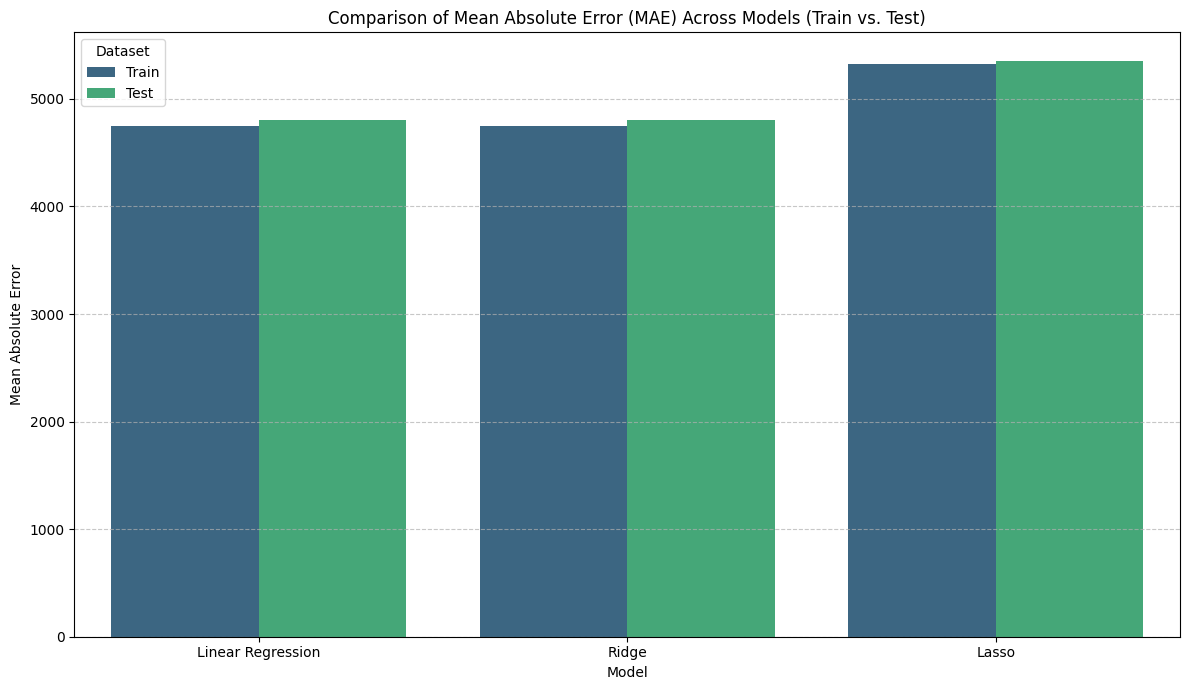

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting MAE
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='MAE', hue='Dataset', data=metrics_df, palette='viridis')
plt.title('Comparison of Mean Absolute Error (MAE) Across Models (Train vs. Test)')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

5.10 Visulaize MSE across 3 models.

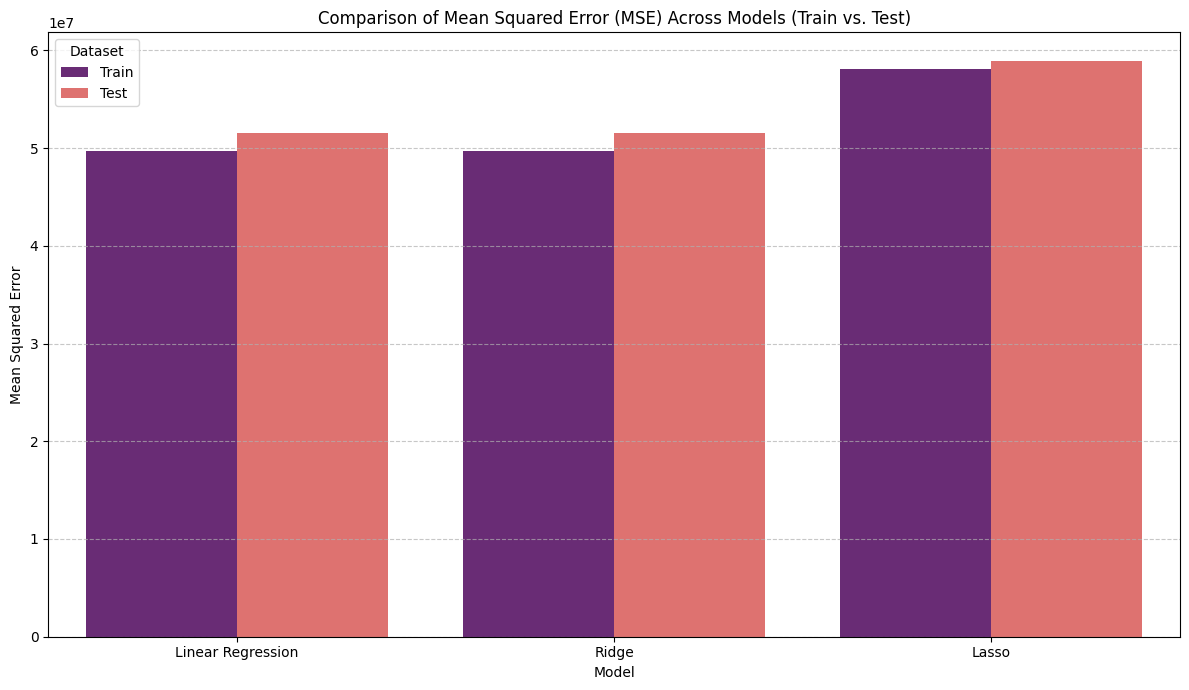

In [43]:
# Plotting MSE
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=metrics_df, palette='magma')
plt.title('Comparison of Mean Squared Error (MSE) Across Models (Train vs. Test)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

We can save the model to a file using pickle library and develop and car prediction API (using the best model from earlier step) to predict car prices based on input prices.
*Scope of this exercise doesn't require deployment. *

In [ ]:
#sample code to save model to a file
#import pickle

# Save the best_model to a file
#with open('best_ridge_model.pkl', 'wb') as file:
    #pickle.dump(best_model, file)

#print("Tuned Ridge Regression model saved as 'best_ridge_model.pkl'.")

Tuned Ridge Regression model saved as 'best_ridge_model.pkl'.


## Summary of Key Findings and Dealership Recommendations

### Model Performance Overview:

Our analysis compared three regression models—Polynomial Linear Regression, Ridge Regression, and Lasso Regression—all utilizing polynomial features of degree 2. The performance metrics (Mean Absolute Error (MAE) and Mean Squared Error (MSE)) for each model on both training and test datasets are summarized below:

| Model             | Dataset | MAE         | MSE          |
| :---------------- | :------ | :---------- | :----------- |
| Linear Regression | Train   | 4747.50     | 4.97e+07     |
| Linear Regression | Test    | 4801.22     | 5.15e+07     |
| Ridge             | Train   | 4747.47     | 4.97e+07     |
| Ridge             | Test    | 4801.37     | 5.15e+07     |
| Lasso             | Train   | 5327.20     | 5.81e+07     |
| Lasso             | Test    | 5351.03     | 5.89e+07     |

Both **Polynomial Linear Regression** and **Ridge Regression** demonstrated very similar and superior predictive accuracy, achieving the lowest MAE and MSE values on both training and test sets. This indicates their strong ability to capture the underlying patterns in the data and generalize well to unseen car data. The `alpha` value for the best Ridge model was very small (`1e-05`), suggesting that only a minimal amount of regularization was needed, which aligns with its close performance to the unregularized Linear Regression model.

**Lasso Regression**, while also performing reasonably well, showed slightly higher MAE and MSE. Its primary benefit lies in feature selection by driving the coefficients of less influential features to exactly zero, thus simplifying the model and allowing further tuning of model. However, for pure predictive accuracy in this context, it was marginally outperformed by the other two models.

**Conclusion:** Given the similar high performance and the added benefit of regularization for robustness, **Ridge Regression is the recommended model** for predicting used car prices.

### Key Drivers of Used Car Prices (from Ridge Regression Coefficient Analysis):

Analyzing the coefficients of the Ridge Regression model, we can identify the most influential factors determining a used car's price:

*   **Year and Odometer:** These remain the most critical predictors. Newer cars with lower mileage command premium prices, and the rate of depreciation accelerates with age and use.
*   **Manufacturer and Model:** The specific manufacturer and model specifications are highly influential.
*   **Drivetrain and Transmission:** Certain drivetrain and transmission configurations are more valued depending on the car's age.
*   **Fuel Type:** Fuel gas type significantly impact price, with influence varying with the year.
*   **Vehicle Type:** Truck and Pickup type demonstrate strong positive correlations with price, particularly in newer models.

### Recommendations for the Used Car Dealership:

Based on the insights from our modeling, here are actionable recommendations for optimizing operations:

1.  **Strategic Inventory Acquisition:**
    *   **Prioritize Newer, Lower-Mileage Vehicles:** Actively seek to acquire cars from recent years with low odometer readings, as these offer the highest profit potential and are most appealing to buyers.
    *   **Focus on High-Value Manufacturer-Model Combinations:** Identify and target the acquisition of specific brands and models that consistently show strong market demand and higher prices.

2.  **Targeted Marketing and Sales:**
    *   **Highlight Key Value-Driving Features:** In all marketing materials, emphasize the most impactful features such as the car's recent year, low mileage, desirable manufacturer, specific model, and favored configurations (e.g., specific drivetrain, fuel type, or vehicle type like trucks/pickups).
    *   **Personalize Pitches:** Equip sales staff with insights on how specific car features contribute to its value, allowing them to better articulate benefits to customers based on model-identified drivers.

3.  **Continuous Improvement:**
    *   **Integrate Feedback Loop:** Continuously feed new sales data back into the model to refine its predictions and ensure it adapts to evolving market trends and buyer preferences.
    *   **Expand Data Collection (Future):** Consider collecting more granular data on vehicle options, trim levels, or regional micro-market trends to potentially enhance predictive accuracy further.

By systematically applying these data-driven recommendations, the dealership can make more informed decisions across its operations, leading to increased profitability and a more competitive market position.